# Document-Term Matrices

...

## What is a document-term matrix?

* D1 = "I like this class"
* D2 = "I love this class"
* D3 = "I tolerate this class"

Then the document-term matrix would be:

|x |I|like|love|tolerate|this|class|
|--|-|----|----|--------|----|-----|
|D1|1|1   |0   |0       |1   |1    |
|D2|1|0   |1   |0       |1   |1    |
|D3|1|0   |0   |1       |1   |1    |

## How to make a DTM from word counts

In [ ]:
import os
import pandas as pd
from textblob import TextBlob
pd.set_option("display.max_rows", 20)

In [ ]:
# Set text folder and metadata path
text_folder = '../corpora/sotu_1900-2018/texts'
path_to_metadata='../corpora/sotu_1900-2018/metadata.xls'

In [ ]:
# Let's first get stop words
import nltk
from nltk.corpus import stopwords
stopwords=set(stopwords.words('english'))

print(stopwords)
print('# stopwords:', len(stopwords))

In [ ]:
# Loop over each of the filenames

def make_dtm(text_folder,n_top_words=1000,normalize=False):
    # get stopwords
    from nltk.corpus import stopwords
    stopwords=set(stopwords.words('english'))

    # make an empty results list
    all_results = []

    # make a count for all words
    from collections import Counter
    all_counts = Counter()

    # for each filename
    filenames=sorted(os.listdir(text_folder))
    for i,fn in enumerate(filenames):
        if not i%10: print('>> looping through #',i,'of',len(filenames),'files:',fn)
        # make sure is a text file
        if not fn.endswith('.txt'): continue
        
        # full path
        full_path = os.path.join(text_folder,fn)

        # open the file
        with open(full_path) as file:
            txt=file.read()

        # make a blob
        blob = TextBlob(txt.lower())

        # make a result dictionary
        text_result = {}

        # set the filename
        text_result['fn']=fn

        # loop over the word counts
        num_words = len(blob.words)

        # for each word,count pair in the blob.word_counts dictionary...
        for word,count in blob.word_counts.items():
            # is the word in the stopwords?
            if word in stopwords: continue  

            # is the word a punctuation?
            if not word[0].isalpha(): continue
            
            # set the normalized version
            if normalize:
                # get the term frequency (count divided by number of words)
                tf = count / num_words

                # set the term frequency result to the key 'word' in the text_result dictionary
                text_result[word] = tf
            else:
                # set the count as a result
                text_result[word] = count

            # add the count to the dictionary of counts for all words
            all_counts[word]+=count

        # add results
        all_results.append(text_result)
    
    # Get the most frequent words
    most_common_words_plus_counts = all_counts.most_common(n_top_words)
    
    # Get only the words
    word_columns = []
    for word,count in most_common_words_plus_counts:
        word_columns.append(word)
    
    # Get columns
    columns=[]
    columns.append('fn')
    columns.extend(word_columns)
    
    # Make dataframe
    df = pd.DataFrame(all_results, columns=columns).set_index('fn').fillna(0)
    
    # return dataframe
    return df

In [ ]:
dtm = make_dtm(text_folder,normalize=True)

In [700]:
# Can sort by particular words
dtm.sort_values('poverty',ascending=False)

,government,must,people,congress,world,new,year,american,states,us,...,september,authorized,postal,materials,understand,facts,fall,offer,partnership,afghanistan
fn,,,,,,,,,,,,,,,,,,,,,
1964.Johnson.txt,0.000000,0.013652,0.000621,0.002792,0.001862,0.003103,0.002482,0.001862,0.000621,0.001551,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1969.Johnson.txt,0.000482,0.001929,0.001447,0.007475,0.003376,0.001206,0.004823,0.002170,0.001929,0.003617,...,0.000000,0.000241,0.000241,0.000000,0.000000,0.000241,0.000000,0.000000,0.000000,0.000000
2000.Clinton.txt,0.000399,0.006248,0.002925,0.002260,0.001994,0.006780,0.003457,0.002659,0.000532,0.002792,...,0.000000,0.000000,0.000000,0.000266,0.000266,0.000000,0.000399,0.000266,0.000133,0.000000
1988.Reagan.txt,0.003819,0.001809,0.003417,0.002412,0.003618,0.001206,0.003216,0.002613,0.001407,0.006030,...,0.000201,0.000000,0.000000,0.000000,0.000201,0.000000,0.000000,0.000804,0.000201,0.000402
1965.Johnson.txt,0.002031,0.003384,0.003610,0.001579,0.004287,0.005190,0.002256,0.003836,0.001354,0.001354,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000226,0.000000,0.000226,0.000000
1985.Reagan.txt,0.003467,0.004392,0.002774,0.001387,0.003005,0.004392,0.002312,0.003699,0.001156,0.006241,...,0.000000,0.000000,0.000000,0.000000,0.000231,0.000000,0.000231,0.000000,0.000231,0.000231
1967.Johnson.txt,0.001664,0.004992,0.003467,0.003883,0.001248,0.003190,0.002358,0.002080,0.000832,0.003606,...,0.000139,0.000139,0.000000,0.000000,0.000277,0.000000,0.000000,0.000000,0.000971,0.000000
2013.Obama.txt,0.001376,0.002751,0.003057,0.002598,0.001223,0.003515,0.002598,0.002751,0.001834,0.002904,...,0.000000,0.000000,0.000000,0.000153,0.000153,0.000000,0.000153,0.000306,0.000459,0.000611
2017.Trump.txt,0.001579,0.003947,0.002960,0.001579,0.003355,0.003750,0.001776,0.006315,0.002368,0.003947,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000197,0.000000


In [ ]:
# Can sort by particular words
dtm.sort_values('jobs',ascending=False)

### Combining DTMs with metadata

In [784]:
# Get the metadata for this corpus
df_meta = pd.read_excel(path_to_metadata).set_index('fn')
df_meta

,President,Year,Party
fn,,,
1900.McKinley.txt,McKinley,1900,Republican
1901.Roosevelt.txt,Roosevelt,1901,Republican
1902.Roosevelt.txt,Roosevelt,1902,Republican
1903.Roosevelt.txt,Roosevelt,1903,Republican
1904.Roosevelt.txt,Roosevelt,1904,Republican
1905.Roosevelt.txt,Roosevelt,1905,Republican
1906.Roosevelt.txt,Roosevelt,1906,Republican
1907.Roosevelt.txt,Roosevelt,1907,Republican
1908.Roosevelt.txt,Roosevelt,1908,Republican


In [785]:
# merge
dtm_meta=df_meta.merge(dtm,on='fn')
dtm_meta

,President,Year,Party,government,must,people,congress,world,new,year,...,september,authorized,postal,materials,understand,facts,fall,offer,partnership,afghanistan
fn,,,,,,,,,,,,,,,,,,,,,
1900.McKinley.txt,McKinley,1900,Republican,0.005690,0.000783,0.002193,0.002871,0.000522,0.001096,0.002454,...,0.000313,0.000209,0.000261,0.000104,0.000052,0.000052,0.000000,0.000000,0.000000,0.000000
1901.Roosevelt.txt,Roosevelt,1901,Republican,0.002597,0.002546,0.002444,0.001629,0.001477,0.000662,0.000407,...,0.000102,0.000051,0.000305,0.000000,0.000051,0.000102,0.000153,0.000204,0.000000,0.000000
1902.Roosevelt.txt,Roosevelt,1902,Republican,0.001637,0.002661,0.002252,0.003582,0.001330,0.000819,0.000716,...,0.000000,0.000000,0.000205,0.000000,0.000000,0.000102,0.000409,0.000000,0.000000,0.000000
1903.Roosevelt.txt,Roosevelt,1903,Republican,0.004013,0.000602,0.001739,0.003076,0.001070,0.001605,0.002608,...,0.000201,0.000201,0.000201,0.000000,0.000000,0.000268,0.000067,0.000134,0.000000,0.000000
1904.Roosevelt.txt,Roosevelt,1904,Republican,0.003270,0.002410,0.002180,0.002180,0.000631,0.000344,0.000631,...,0.000000,0.000057,0.000057,0.000000,0.000115,0.000230,0.000115,0.000057,0.000000,0.000000
1905.Roosevelt.txt,Roosevelt,1905,Republican,0.003505,0.002270,0.002031,0.002111,0.000677,0.000438,0.000797,...,0.000040,0.000159,0.000000,0.000040,0.000080,0.000159,0.000040,0.000159,0.000000,0.000000
1906.Roosevelt.txt,Roosevelt,1906,Republican,0.003513,0.002116,0.002582,0.001143,0.000381,0.000720,0.000423,...,0.000000,0.000000,0.000000,0.000000,0.000042,0.000127,0.000169,0.000000,0.000000,0.000000
1907.Roosevelt.txt,Roosevelt,1907,Republican,0.003393,0.002408,0.001569,0.001824,0.000584,0.000584,0.000912,...,0.000182,0.000073,0.000146,0.000000,0.000036,0.000255,0.000073,0.000036,0.000000,0.000000
1908.Roosevelt.txt,Roosevelt,1908,Republican,0.002882,0.001750,0.002831,0.001441,0.000721,0.000978,0.000618,...,0.000103,0.000206,0.000257,0.000000,0.000103,0.000154,0.000051,0.000000,0.000000,0.000000


#### Plotting meta+DTM

In [ ]:
# Plot poverty over time
df_all.plot(x='Year',y='poverty',figsize=(10,6))

In [ ]:
# Multi-line graphs
fig, ax = plt.subplots(figsize=(10, 6))

# The Long History of America First?
df_all.plot(x='Year',y='america',ax=ax)
df_all.plot(x='Year',y='world',ax=ax)

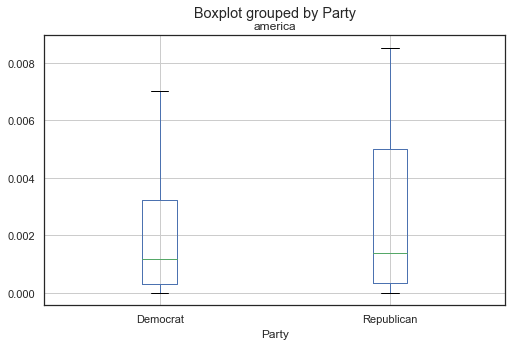

In [753]:
# Boxplots by party

df_all.boxplot('world',by='Party',figsize=(8,5))

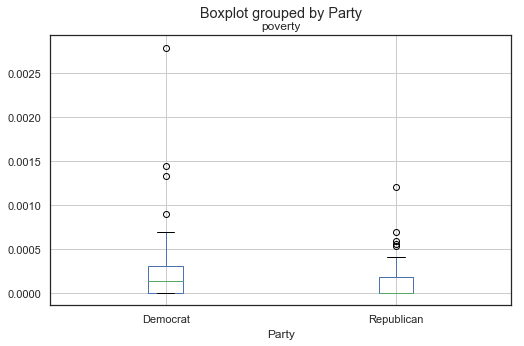

In [754]:
# Poverty?
df_all.boxplot('poverty',by='Party',figsize=(8,5))

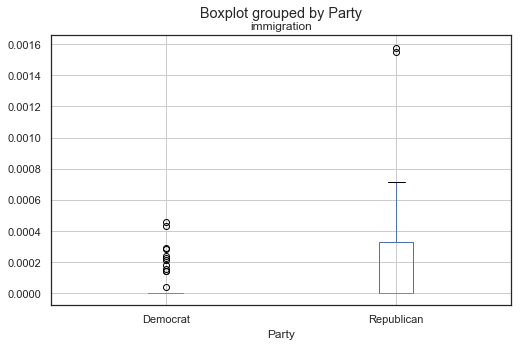

In [756]:
# Immigration?
df_all.boxplot('immigration',by='Party',figsize=(8,5))

## Most distinctive words

How can we find the words directly which distinguish Republican and Democrat States of the Union? Or between pre- and post-war America?

### (1) Difference of means

In [ ]:
dtm_meta.groupby('Party').mean()

In [ ]:
dtm_meta.groupby('Party').mean().T

In [ ]:
round(dtm_meta.groupby('Party').mean().T * 1000,2)

In [ ]:
dtm_meta_T = dtm_meta.groupby('Party').mean().T * 1000
dtm_meta_T

In [ ]:
dtm_meta_T['D-R']=dtm_meta_T['Democrat'] - dtm_meta_T['Republican']
round(dtm_meta_T,2)

In [ ]:
round(dtm_meta_T.sort_values('D-R'),2)

In [ ]:
dtm_meta.boxplot('war',by='Party',figsize=(8,5))

In [ ]:
dtm_meta.boxplot('war',by='Party',figsize=(8,5))

In [ ]:
dtm_meta.sort_values('war',ascending=False)

In [ ]:
# Sort by government
dtm_meta.sort_values('government',ascending=False)

In [ ]:
# Why is Nixon using government so much?
nixon_path = os.path.join(text_folder, '1971.Nixon.txt')
print(nixon_path)

# Open the file
with open(nixon_path) as file:
    nixon_txt=file.read()
    
# make nltk version of the text (useful for concordance)
import nltk
nixon_words = nltk.word_tokenize(nixon_txt)
nixon_nltk = nltk.text.Text(nixon_words)

# get concordance
nixon_nltk.concordance('government',width=100,lines=1000)

In [ ]:
def concordance(text_folder,filename,word,width=100,lines=1000):
    # Get the path
    text_path = os.path.join(text_folder, filename)
    print(text_path)

    # Open the file
    with open(text_path) as file:
        text_txt=file.read()

    # make nltk version of the text (useful for concordance)
    import nltk
    text_words = nltk.word_tokenize(text_txt)
    text_nltk = nltk.text.Text(text_words)

    # get concordance
    text_nltk.concordance(word,width=width,lines=lines)
    

In [ ]:
concordance(text_folder,'1938.Roosevelt.txt','government')

In [ ]:
dtm_meta.boxplot('war',by='Party',figsize=(8,5))

In [ ]:
dtm_meta.groupby('Party').mean().T

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

for party,party_dtm in dtm_meta.groupby('Party')

### (2) TF-IDF

#### TF: Term Frequency

<center><img src="https://latex.codecogs.com/png.latex?TF = \frac{n_w}{n_d}"></center>

Where:
* *Nw* is the number of times a given word *w* appears in a document.
* *Nd* is the number of words in that document.

In [ ]:
# set a given word?
given_word='jobs'

In [ ]:
# We already have that calculated here:
tf_series = dtm[given_word]
tf_series.sort_values(ascending=False)

#### IDF: Inverse Document Frequency

<center><img src="https://latex.codecogs.com/png.latex?IDF = \log \left( \frac{c_d}{i_d} \right)"></center>

Where:
* <img src="https://latex.codecogs.com/png.latex?{c_d}"> is the count of documents in the corpus.
* <img src="https://latex.codecogs.com/png.latex?{i_d}"> = is the number of documents in which that word appears.

In [ ]:
# Get the number of documents
num_docs = len(dtm)
num_docs

In [ ]:
# Get the number of documents a given word appears
dtm[dtm[given_word]>0][given_word]

In [ ]:
num_docs_with_word=len(dtm[dtm[given_word]>0])

In [ ]:
import numpy as np
idf = np.log(num_docs/num_docs_with_word)
idf

In [ ]:
tfidf_series = tf_series * idf
tfidf_series.sort_values(ascending=False)

In [ ]:
pd.DataFrame({'tfidf':tfidf_series, 'tf':tf_series}).plot(x='tf',y='tfidf',kind='scatter')

In [ ]:
# make
def to_tfidf(dtm):
    # list of dictionaries
    dtm_tfidf = pd.DataFrame()
    
    for word in dtm.columns:
        # tf
        tf_series = dtm[word]
        
        # idf
        num_docs = len(dtm)
        num_docs_with_word=len(dtm[dtm[word]>0])
        idf=np.log(num_docs/num_docs_with_word)
        
        # tfidf
        tfidf_series = tf_series * idf
        dtm_tfidf[word]=tfidf_series
    
    return dtm_tfidf

In [ ]:
dtm_tfidf=to_tfidf(dtm)
dtm_tfidf

In [701]:
word='america'
dtm[word].nlargest(10)

fn
2002.Bush.txt       0.008536
1986.Reagan.txt     0.008382
2006.Bush.txt       0.008057
2004.Bush.txt       0.007106
1997.Clinton.txt    0.007021
1974.Nixon.txt      0.006928
1970.Nixon.txt      0.006910
1989.Bush.txt       0.006548
1987.Reagan.txt     0.006404
1980.Carter.txt     0.006368
Name: america, dtype: float64

In [702]:
dtm_tfidf[word].nlargest(10)

fn
2002.Bush.txt       0.000522
1986.Reagan.txt     0.000513
2006.Bush.txt       0.000493
2004.Bush.txt       0.000435
1997.Clinton.txt    0.000429
1974.Nixon.txt      0.000424
1970.Nixon.txt      0.000423
1989.Bush.txt       0.000400
1987.Reagan.txt     0.000392
1980.Carter.txt     0.000389
Name: america, dtype: float64

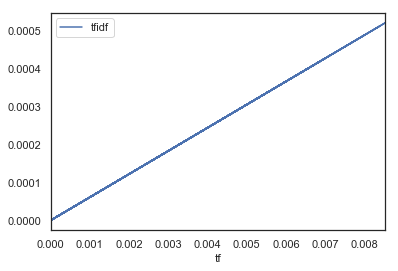

In [704]:
pd.DataFrame({'tf':dtm[word], 'tfidf':dtm_tfidf[word]}).plot(x='tf',y='tfidf')

In [706]:
fn='2002.Bush.txt'
dtm_tfidf.loc[fn].nlargest(10)

afghanistan    0.005499
terrorists     0.004120
weapons        0.001757
september      0.001648
jobs           0.001610
corps          0.001531
evil           0.001399
allies         0.001202
destruction    0.001191
enemies        0.001145
Name: 2002.Bush.txt, dtype: float64

In [707]:
dtm.loc[fn].nlargest(10)

america        0.008536
world          0.004915
security       0.004915
must           0.004656
american       0.003880
people         0.003621
freedom        0.003621
new            0.003363
good           0.003363
afghanistan    0.003363
Name: 2002.Bush.txt, dtype: float64

In [708]:
fn='2017.Trump.txt'
dtm_tfidf.loc[fn].nlargest(10)

tonight        0.002203
thank          0.001817
immigration    0.001669
companies      0.001363
across         0.001239
jobs           0.001005
asking         0.000970
access         0.000930
big            0.000797
drugs          0.000791
Name: 2017.Trump.txt, dtype: float64

In [722]:
n_words = 10
for index in reversed(dtm_tfidf.index):
    # get row for this index
    row=dtm_tfidf.loc[index]
    
    # get the lagest words
    top_words_series=row.nlargest(n_words)
    top_words_list=list(top_words_series.index)
    top_words_str=', '.join(top_words_list)
    
    # print
    print('##',index.upper())
    print(top_words_str)
    print()

## 2018.TRUMP.TXT
tonight, terrorists, immigration, veterans, drugs, americans, north, police, korea, nuclear

## 2017.TRUMP.TXT
tonight, thank, immigration, companies, across, jobs, asking, access, big, drugs

## 2016.OBAMA.TXT
n't, ca, big, terrorists, job, tonight, agree, get, vote, workers

## 2015.OBAMA.TXT
n't, college, tonight, businesses, jobs, terrorists, everyone, rules, families, class

## 2014.OBAMA.TXT
n't, businesses, jobs, tonight, afghanistan, college, get, job, parents, americans

## 2013.OBAMA.TXT
n't, jobs, tonight, ca, vote, cuts, businesses, families, medicare, energy

## 2012.OBAMA.TXT
n't, ca, jobs, businesses, oil, rules, companies, tonight, get, company

## 2011.OBAMA.TXT
n't, tonight, jobs, company, students, college, businesses, race, technology, companies

## 2010.OBAMA.TXT
n't, businesses, jobs, clean, ca, tonight, banks, took, values, families

## 2009.OBAMA.TXT
n't, college, banks, tonight, recovery, ensure, jobs, crisis, businesses, iraq

## 2008.BUSH.TX

### (3) Fisher's exact test

In [745]:
# For this we need a document-term matrix *of raw counts*
dtm_counts = make_dtm(text_folder,normalize=False)

>> looping through # 0 of 118 files: 1900.McKinley.txt
>> looping through # 10 of 118 files: 1910.Taft.txt
>> looping through # 20 of 118 files: 1920.Wilson.txt
>> looping through # 30 of 118 files: 1930.Hoover.txt
>> looping through # 40 of 118 files: 1941.Roosevelt.txt
>> looping through # 50 of 118 files: 1951.Truman.txt
>> looping through # 60 of 118 files: 1961.Eisenhower.txt
>> looping through # 70 of 118 files: 1971.Nixon.txt
>> looping through # 80 of 118 files: 1981.Carter.txt
>> looping through # 90 of 118 files: 1991.Bush.txt
>> looping through # 100 of 118 files: 2001.Bush.txt
>> looping through # 110 of 118 files: 2011.Obama.txt


In [759]:
dtm_counts_meta = df_meta.merge(dtm_counts,on='fn')
dtm_counts_meta

,President,Year,fn,Party,government,must,people,congress,world,new,...,september,authorized,postal,materials,understand,facts,fall,offer,partnership,afghanistan
0,McKinley,1900,1900.McKinley.txt,Republican,109.0,15.0,42,55,10.0,21.0,...,6.0,4.0,5.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0
1,Roosevelt,1901,1901.Roosevelt.txt,Republican,51.0,50.0,48,32,29.0,13.0,...,2.0,1.0,6.0,0.0,1.0,2.0,3.0,4.0,0.0,0.0
2,Roosevelt,1902,1902.Roosevelt.txt,Republican,16.0,26.0,22,35,13.0,8.0,...,0.0,0.0,2.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0
3,Roosevelt,1903,1903.Roosevelt.txt,Republican,60.0,9.0,26,46,16.0,24.0,...,3.0,3.0,3.0,0.0,0.0,4.0,1.0,2.0,0.0,0.0
4,Roosevelt,1904,1904.Roosevelt.txt,Republican,57.0,42.0,38,38,11.0,6.0,...,0.0,1.0,1.0,0.0,2.0,4.0,2.0,1.0,0.0,0.0
5,Roosevelt,1905,1905.Roosevelt.txt,Republican,88.0,57.0,51,53,17.0,11.0,...,1.0,4.0,0.0,1.0,2.0,4.0,1.0,4.0,0.0,0.0
6,Roosevelt,1906,1906.Roosevelt.txt,Republican,83.0,50.0,61,27,9.0,17.0,...,0.0,0.0,0.0,0.0,1.0,3.0,4.0,0.0,0.0,0.0
7,Roosevelt,1907,1907.Roosevelt.txt,Republican,93.0,66.0,43,50,16.0,16.0,...,5.0,2.0,4.0,0.0,1.0,7.0,2.0,1.0,0.0,0.0
8,Roosevelt,1908,1908.Roosevelt.txt,Republican,56.0,34.0,55,28,14.0,19.0,...,2.0,4.0,5.0,0.0,2.0,3.0,1.0,0.0,0.0,0.0
9,Taft,1909,1909.Taft.txt,Republican,80.0,6.0,7,36,11.0,15.0,...,4.0,2.0,8.0,1.0,0.0,4.0,1.0,2.0,0.0,0.0


In [797]:
Rs=dtm_counts[df_meta.Party == 'Republican']
Ds=dtm_counts[df_meta.Party == 'Democrat']
Rs

,government,must,people,congress,world,new,year,american,states,us,...,september,authorized,postal,materials,understand,facts,fall,offer,partnership,afghanistan
fn,,,,,,,,,,,,,,,,,,,,,
1900.McKinley.txt,109.0,15.0,42,55,10.0,21.0,47.0,37.0,79,7.0,...,6.0,4.0,5.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0
1901.Roosevelt.txt,51.0,50.0,48,32,29.0,13.0,8.0,42.0,44,28.0,...,2.0,1.0,6.0,0.0,1.0,2.0,3.0,4.0,0.0,0.0
1902.Roosevelt.txt,16.0,26.0,22,35,13.0,8.0,7.0,5.0,9,12.0,...,0.0,0.0,2.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0
1903.Roosevelt.txt,60.0,9.0,26,46,16.0,24.0,39.0,10.0,77,15.0,...,3.0,3.0,3.0,0.0,0.0,4.0,1.0,2.0,0.0,0.0
1904.Roosevelt.txt,57.0,42.0,38,38,11.0,6.0,11.0,24.0,47,15.0,...,0.0,1.0,1.0,0.0,2.0,4.0,2.0,1.0,0.0,0.0
1905.Roosevelt.txt,88.0,57.0,51,53,17.0,11.0,20.0,43.0,63,28.0,...,1.0,4.0,0.0,1.0,2.0,4.0,1.0,4.0,0.0,0.0
1906.Roosevelt.txt,83.0,50.0,61,27,9.0,17.0,10.0,47.0,55,19.0,...,0.0,0.0,0.0,0.0,1.0,3.0,4.0,0.0,0.0,0.0
1907.Roosevelt.txt,93.0,66.0,43,50,16.0,16.0,25.0,23.0,56,8.0,...,5.0,2.0,4.0,0.0,1.0,7.0,2.0,1.0,0.0,0.0
1908.Roosevelt.txt,56.0,34.0,55,28,14.0,19.0,12.0,14.0,38,13.0,...,2.0,4.0,5.0,0.0,2.0,3.0,1.0,0.0,0.0,0.0


In [801]:
word='immigration'
sum_word_Rs = Rs[word].sum()
sum_word_Ds = Ds[word].sum()

print(sum_word_Rs,sum_word_Ds)

94.0 26.0


In [814]:
Rs.sum()

government     1923.0
must           1316.0
people         1335.0
congress       1378.0
world           960.0
new             943.0
year            939.0
american       1087.0
states         1197.0
us              838.0
                ...  
september        59.0
authorized       62.0
postal           84.0
materials        37.0
understand       44.0
facts            61.0
fall             51.0
offer            49.0
partnership      40.0
afghanistan      43.0
Length: 1000, dtype: float64

In [817]:
sum_allword_Rs=Rs.sum().sum()
sum_allword_Rs

156622.0

In [818]:
sum_allword_Ds=Ds.sum().sum()
sum_allword_Ds

114655.0

In [816]:
sum_notword_Rs = sum_allword_Rs - sum_word_Rs
sum_notword_Rs

156528.0

In [819]:
sum_notword_Ds = sum_allword_Ds - sum_word_Ds
sum_notword_Ds

114629.0

In [820]:
contingency_table = [
    [sum_word_Rs, sum_notword_Rs],
    [sum_word_Ds, sum_notword_Ds]
]

In [822]:
contingency_table

[[94.0, 156528.0], [26.0, 114629.0]]

In [823]:
from scipy.stats import fisher_exact

oddsratio, pvalue = fisher_exact(contingency_table)
oddsratio, pvalue

(2.647628047869538, 2.7908692902884414e-06)

#### "Stacking" a DTM

In [747]:
dtm_counts.stack()

fn                            
1900.McKinley.txt  government     109.0
                   must            15.0
                   people          42.0
                   congress        55.0
                   world           10.0
                   new             21.0
                   year            47.0
                   american        37.0
                   states          79.0
                   us               7.0
                                  ...  
2018.Trump.txt     september        1.0
                   authorized       0.0
                   postal           0.0
                   materials        0.0
                   understand       2.0
                   facts            0.0
                   fall             0.0
                   offer            0.0
                   partnership      0.0
                   afghanistan      1.0
Length: 118000, dtype: float64

In [748]:
dtm_stacked = dtm_counts.stack().reset_index()
dtm_stacked

,fn,level_1,0
0,1900.McKinley.txt,government,109.0
1,1900.McKinley.txt,must,15.0
2,1900.McKinley.txt,people,42.0
3,1900.McKinley.txt,congress,55.0
4,1900.McKinley.txt,world,10.0
5,1900.McKinley.txt,new,21.0
6,1900.McKinley.txt,year,47.0
7,1900.McKinley.txt,american,37.0
8,1900.McKinley.txt,states,79.0
9,1900.McKinley.txt,us,7.0


In [749]:
dtm_stacked.columns = ['fn','word','count']
dtm_stacked

,fn,word,count
0,1900.McKinley.txt,government,109.0
1,1900.McKinley.txt,must,15.0
2,1900.McKinley.txt,people,42.0
3,1900.McKinley.txt,congress,55.0
4,1900.McKinley.txt,world,10.0
5,1900.McKinley.txt,new,21.0
6,1900.McKinley.txt,year,47.0
7,1900.McKinley.txt,american,37.0
8,1900.McKinley.txt,states,79.0
9,1900.McKinley.txt,us,7.0


In [ ]:
# Pivot table back to unstacked original form
dtm_stacked.pivot(index='fn',columns='word',values='count')

In [824]:
# Merge stacked DTM with meta
dtm_stacked_meta = df_meta.merge(dtm_stacked,on='fn')
dtm_stacked_meta

,fn,President,Year,Party,word,count
0,1900.McKinley.txt,McKinley,1900,Republican,government,109.0
1,1900.McKinley.txt,McKinley,1900,Republican,must,15.0
2,1900.McKinley.txt,McKinley,1900,Republican,people,42.0
3,1900.McKinley.txt,McKinley,1900,Republican,congress,55.0
4,1900.McKinley.txt,McKinley,1900,Republican,world,10.0
5,1900.McKinley.txt,McKinley,1900,Republican,new,21.0
6,1900.McKinley.txt,McKinley,1900,Republican,year,47.0
7,1900.McKinley.txt,McKinley,1900,Republican,american,37.0
8,1900.McKinley.txt,McKinley,1900,Republican,states,79.0
9,1900.McKinley.txt,McKinley,1900,Republican,us,7.0


In [838]:
num_word_Rs=dtm_stacked_meta.query('word == "government" & Party == "Republican"')['count'].sum()
num_word_notRs=dtm_stacked_meta.query('word == "government" & Party != "Republican"')['count'].sum()
num_notword_Rs=dtm_stacked_meta.query('word != "government" & Party == "Republican"')['count'].sum()
num_notword_notRs=dtm_stacked_meta.query('word != "government" & Party != "Republican"')['count'].sum()

In [839]:
contingency_table = [
    [num_word_Rs, num_word_notRs],
    [num_notword_Rs, num_notword_notRs]
]
fisher_exact(contingency_table)

(1.648675951228004, 1.526536684249154e-35)

In [917]:
# Try every word!
result_list=[]

party='Republican'
for word in dtm_stacked_meta['word'].unique():
    num_word_Rs=dtm_stacked_meta.query('word == "'+word+'" & Party == "'+party+'"')['count'].sum()
    num_word_notRs=dtm_stacked_meta.query('word == "'+word+'" & Party != "'+party+'"')['count'].sum()
    num_notword_Rs=dtm_stacked_meta.query('word != "'+word+'" & Party == "'+party+'"')['count'].sum()
    num_notword_notRs=dtm_stacked_meta.query('word != "'+word+'" & Party != "'+party+'"')['count'].sum()
    contingency_table = [
        [num_word_Rs, num_word_notRs],
        [num_notword_Rs, num_notword_notRs]
    ]
    oddsratio,pvalue=fisher_exact(contingency_table)
    if oddsratio>2 and pvalue<0.05:
        print('{oddsratio} to 1 = the odds of "{word}" appearing in {party} (vs. non-{party}) texts'.format(
            word=word,party=party,oddsratio=round(oddsratio,2)))

    result_dict={}
    result_dict['word']=word
    result_dict['oddsratio']=oddsratio
    result_dict['pvalue']=pvalue
    result_dict['group']=party
    result_list.append(result_dict)

df_mdw = pd.DataFrame(result_list)

2.24 to 1 = the odds of "upon" appearing in Republican (vs. non-Republican) texts
2.84 to 1 = the odds of "law" appearing in Republican (vs. non-Republican) texts
2.17 to 1 = the odds of "service" appearing in Republican (vs. non-Republican) texts
2.28 to 1 = the odds of "foreign" appearing in Republican (vs. non-Republican) texts
3.81 to 1 = the odds of "department" appearing in Republican (vs. non-Republican) texts
2.23 to 1 = the odds of "general" appearing in Republican (vs. non-Republican) texts
2.41 to 1 = the odds of "conditions" appearing in Republican (vs. non-Republican) texts
2.99 to 1 = the odds of "commission" appearing in Republican (vs. non-Republican) texts
2.03 to 1 = the odds of "man" appearing in Republican (vs. non-Republican) texts
4.24 to 1 = the odds of "commerce" appearing in Republican (vs. non-Republican) texts
2.1 to 1 = the odds of "justice" appearing in Republican (vs. non-Republican) texts
2.22 to 1 = the odds of "secure" appearing in Republican (vs. non-R

In [883]:
df_mdw[df_mdw.group=='Democrat'].sort_values('oddsratio',ascending=False).head(20)

,group,oddsratio,pvalue,word
1930,Democrat,9.796469,8.628732e-21,u.s
1608,Democrat,8.204088,2.130250e-27,college
1877,Democrat,6.530729,2.990509e-17,ca
1115,Democrat,5.620983,1.613132e-67,n't
1503,Democrat,4.988855,4.686411e-22,businesses
1840,Democrat,4.783872,9.129844e-14,global
1718,Democrat,4.015181,2.755562e-13,raise
1369,Democrat,3.766358,4.459522e-20,challenge
1087,Democrat,3.602814,4.465894e-48,million
1816,Democrat,3.526998,2.500230e-10,cuts


In [882]:
df_mdw[df_mdw.group=='Republican'].sort_values('oddsratio',ascending=False).head(20)

,group,oddsratio,pvalue,word
297,Republican,29.814889,1.269588e-49,court
907,Republican,23.439326,1.901514e-19,supervision
508,Republican,20.029269,1.842075e-31,cent
716,Republican,14.651442,1.066697e-21,bureau
410,Republican,13.997990,1.429226e-33,tariff
536,Republican,10.191117,1.458381e-24,courts
918,Republican,9.521590,8.666267e-15,claims
972,Republican,9.102826,6.863674e-14,satisfactory
871,Republican,8.789364,4.646844e-15,investigation
992,Republican,7.690104,1.390131e-12,postal


In [890]:
# Forest?
dtm['forest'].nlargest(10)

fn
1904.Roosevelt.txt     0.001377
1901.Roosevelt.txt     0.000815
1903.Roosevelt.txt     0.000468
1905.Roosevelt.txt     0.000438
1908.Roosevelt.txt     0.000412
1949.Truman.txt        0.000293
1913.Wilson.txt        0.000281
1990.Bush.txt          0.000259
1928.Coolidge.txt      0.000248
1957.Eisenhower.txt    0.000240
Name: forest, dtype: float64

#### (4) Mann-Whitney U test

In [892]:
# See: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html
from scipy.stats import mannwhitneyu

In [893]:
Rs=dtm[df_meta.Party=='Republican']
Ds=dtm[df_meta.Party=='Democrat']

In [895]:
word='forest'
x=Rs[word]
y=Ds[word]
mannwhitneyu(x,y)

MannwhitneyuResult(statistic=1517.0, pvalue=0.035799315826459614)

In [900]:
#dtm_stacked_meta.query('Party == "Republican" and word=="forest"')

In [906]:
def compute_mannwhitney(group1,group2,words=None):
    if not words:
        words = set(group1.columns) & set(group2.columns)
    
    result_list=[]
    for word in words:
        x=group1[word]
        y=group2[word]
        
        mwU, pvalue = mannwhitneyu(x,y)
    
        result_dict={}
        result_dict['word']=word
        result_dict['mannwhitney_U']=mwU
        result_dict['mannwhitney_pvalue']=pvalue
        result_list.append(result_dict)
        
    return pd.DataFrame(result_list)

In [914]:
df_mannwhitney=compute_mannwhitney(Rs,Ds)

In [915]:
# Top 20 Republicans
df_mannwhitney.sort_values('mannwhitney_U',ascending=True).head(20)

,mannwhitney_U,mannwhitney_pvalue,word
947,924.0,8.597051e-08,court
197,981.0,6.904963e-06,secretary
554,1005.0,8.765470e-06,direction
268,1033.0,7.621396e-05,federal
917,1033.0,1.403367e-05,directed
374,1042.0,9.294315e-05,state
131,1045.0,4.335046e-06,governmental
471,1046.0,1.011949e-04,take
222,1060.0,1.360918e-04,government
283,1069.0,1.095839e-04,carry


In [916]:
# Top 20 Democrats
df_mannwhitney.sort_values('mannwhitney_U',ascending=False).head(20)

,mannwhitney_U,mannwhitney_pvalue,word
681,1736.0,0.498822,facilities
232,1735.5,0.500000,balanced
539,1735.0,0.498859,extend
443,1734.5,0.497675,nuclear
61,1734.0,0.496540,terms
453,1734.0,0.496552,foundation
652,1734.0,0.496498,actions
392,1733.0,0.494254,industries
416,1733.0,0.494554,success
121,1732.0,0.492419,real


In [927]:
df_mannwhitney[df_mannwhitney.word=="iraq"]

,mannwhitney_U,mannwhitney_pvalue,word
697,1704.0,0.39951,iraq


In [928]:
df_mdw[df_mdw.word=="iraq"]

,group,oddsratio,pvalue,word
725,Republican,2.658105,0.000002,iraq


In [929]:
dtm_meta_T.loc['iraq']

Party
Democrat      0.068470
Republican    0.297721
D-R          -0.229250
Name: iraq, dtype: float64

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


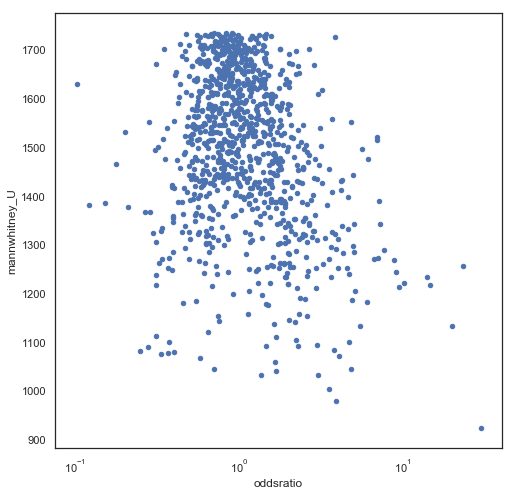

In [937]:
df_mdw.merge(df_mannwhitney,on='word').plot(x='oddsratio',logx=True,y='mannwhitney_U',kind='scatter',figsize=(8,8))